In [1]:
import numpy as np
from  pycaret.regression import *
import pandas as pd
import os

In [4]:
path=os.path.dirname(os.path.realpath('datos.xlsx'))
path

'C:\\Users\\Admin\\OneDrive\\Documentos\\DataScience2021-2\\Trabajos_propios_felipe\\Proyecto_final'

In [5]:
df=pd.read_excel('C:\\Users\\Admin\\OneDrive\\Documentos\\DataScience2021-2\\Trabajos_propios_felipe\\Proyecto_final\\datos.xlsx')
df.head()

,Unnamed: 0,NÚMERO PEDIDO,ORDEN NÚMERO,FECHA ORDEN,FECHA ENTREGA,FECHA APROBACION,CATEGORÍA,SUBCATEGORIA,PROVEEDOR,USUARIO,USUARIO APROBADOR,DIRECCION PEDIDO,DIRECCION FACTURACION,CENTRO DE COSTOS,PRESUPUESTO,PORTAL,ESTADO,PRODUCTO O SERVICIO,CODIGO PORTAL,CANTIDAD PEDIDA,CANTIDAD RECIBIDA,PRECIO UNITARIO,PRECIO UNITARIO + IVA,IVA,TOTAL SIN IVA,TOTAL + IVA,FECHA ULTIMO MOVIMIENTO,Dias_transcurridos,Clasi_Anomalia
0,0,# 49561,# 2582,2021-11-10,2021-11-10,2021-11-10,Otro,Lámparas y bombillas y componentes para lámparas,Proveedor 1,Usuario solicitante 1,Usuario Aprobador 1,Direccion 1,NaN,Centro de costos 1,Presupuesto 1,Portal comprador 1,Orden en Proceso,PANEL LED SOBREPONER 24W REDONDO LUZ BLANCA,1200035000063,2.0,NaN,23.364,27.803,4.439,46.728,55.606,2021-11-10,0,1
1,1,# 49560,# 2581,2021-11-10,2021-11-11,2021-11-10,Otro,Publicidad,Proveedor 2,Usuario solicitante 2,Usuario Aprobador 2,Direccion 1,NaN,Centro de costos 2,Presupuesto 2,Portal comprador 1,Recibido,ACTIVIDADES COMERCIALES,1K15774,1.0,1.0,1.476.972,1.757.597,280.625,1.476.972,1.757.597,2021-11-10,0,-1
2,2,# 49559,# 2580,2021-11-10,2021-11-10,2021-11-10,Alimentos y Bebidas,Alimentos preparados y conservados,Proveedor 3,Usuario solicitante 3,Usuario Aprobador 3,Direccion 2,NaN,Centro de costos 3,Presupuesto 3,Portal comprador 1,Orden en Proceso,Lasagna,1K7609,10.0,NaN,15.500,15.500,0,155.000,155.000,2021-11-10,0,1
3,3,# 49558,# 1892,2021-11-10,2021-11-12,2021-11-10,Alimentos y Bebidas,Productos de carne y aves de corral,Proveedor 4,Usuario solicitante 4,Usuario Aprobador 4,Direccion 3,NaN,Centro de costos 4,Presupuesto 4,Portal comprador 2,Orden en Proceso,Pecho de Res Limpio/Sin Grasa,1K15459,50.0,NaN,22.000,22.000,0,1.100.000,1.100.000,2021-11-10,0,1
4,4,# 49557,# 1,2021-11-10,2021-11-09,2021-11-10,Otro,Otra,Proveedor 5,Usuario solicitante 5,Usuario Aprobador 5,Direccion 4,NaN,NaN,NaN,Portal comprador 3,Recibido,"LIBRO CABEZA, CORAZON Y MANOS",1K15761,7.0,7.0,92.084,109.580,17.496,644.588,767.060,2021-11-10,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21259 entries, 0 to 21258
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               21259 non-null  int64         
 1   NÚMERO PEDIDO            21259 non-null  object        
 2   ORDEN NÚMERO             21259 non-null  object        
 3   FECHA ORDEN              21259 non-null  datetime64[ns]
 4   FECHA ENTREGA            17017 non-null  object        
 5   FECHA APROBACION         21259 non-null  datetime64[ns]
 6   CATEGORÍA                21259 non-null  object        
 7   SUBCATEGORIA             21259 non-null  object        
 8   PROVEEDOR                21259 non-null  object        
 9   USUARIO                  21259 non-null  object        
 10  USUARIO APROBADOR        21259 non-null  object        
 11  DIRECCION PEDIDO         21259 non-null  object        
 12  DIRECCION FACTURACION    10006 n

In [7]:
df['FECHA ORDEN']=pd.to_datetime(df['FECHA ORDEN'],format='%Y-%m-%d',errors = 'coerce')
df['FECHA ENTREGA']=pd.to_datetime(df['FECHA ENTREGA'],format='%Y-%m-%d',errors = 'coerce')
df['FECHA APROBACION']=pd.to_datetime(df['FECHA APROBACION'],format='%Y-%m-%d',errors = 'coerce')
df['FECHA ULTIMO MOVIMIENTO']=pd.to_datetime(df['FECHA ULTIMO MOVIMIENTO'],format='%Y-%m-%d',errors = 'coerce')
df['PRECIO UNITARIO']=df['PRECIO UNITARIO'].apply(lambda x:float(x.replace('.','')))
df['PRECIO UNITARIO + IVA']=df['PRECIO UNITARIO + IVA'].apply(lambda x:float(x.replace('.','')))
df['IVA']=df['IVA'].apply(lambda x:float(x.replace('.','')))
df['TOTAL SIN IVA']=df['TOTAL SIN IVA'].apply(lambda x:float(x.replace('.','')))
df['TOTAL + IVA']=df['TOTAL + IVA'].apply(lambda x:float(x.replace('.','')))


In [9]:
df['dia fecha orden']=df['FECHA ORDEN'].dt.dayofweek #0 lunes, 6 domingo
df['mes fecha orden']=df['FECHA ORDEN'].dt.month #Meses de ordbación 
df['semana del año orden']=df['FECHA ORDEN'].dt.isocalendar().week


In [10]:
df.columns

Index(['Unnamed: 0', 'NÚMERO PEDIDO', 'ORDEN NÚMERO', 'FECHA ORDEN',
       'FECHA ENTREGA', 'FECHA APROBACION', 'CATEGORÍA', 'SUBCATEGORIA',
       'PROVEEDOR', 'USUARIO', 'USUARIO APROBADOR', 'DIRECCION PEDIDO',
       'DIRECCION FACTURACION', 'CENTRO DE COSTOS', 'PRESUPUESTO', 'PORTAL',
       'ESTADO', 'PRODUCTO O SERVICIO', 'CODIGO PORTAL', 'CANTIDAD PEDIDA',
       'CANTIDAD RECIBIDA', 'PRECIO UNITARIO', 'PRECIO UNITARIO + IVA', 'IVA',
       'TOTAL SIN IVA', 'TOTAL + IVA', 'FECHA ULTIMO MOVIMIENTO',
       'Dias_transcurridos', 'Clasi_Anomalia', 'dia fecha aprobacion',
       'mes fecha aprobacion', 'semana del año aprobacion', 'dia fecha orden',
       'mes fecha orden', 'semana del año orden'],
      dtype='object')

In [11]:
variables=df[[ 'dia fecha orden',
       'mes fecha orden', 'semana del año orden','USUARIO APROBADOR','CATEGORÍA','Clasi_Anomalia','Dias_transcurridos']]

In [12]:
variables=variables.dropna()

In [13]:
variables.shape

(21259, 7)

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
variables['semana del año orden']=variables['semana del año orden'].astype('float64')


In [15]:
#Datos de entrenamiento y prueba
train,test=train_test_split(variables,train_size=0.7,random_state=1234)
print('entrenamiento: ',train.shape)
print('test: ',test.shape)

entrenamiento:  (14881, 7)
test:  (6378, 7)


In [18]:
setup(train,target='Dias_transcurridos',
            train_size=0.7,
            preprocess=True,
            remove_multicollinearity=True,
            multicollinearity_threshold=0.8,
            numeric_features=['dia fecha orden',
                           'mes fecha orden','semana del año orden'],
            
            normalize=True,
            normalize_method='minmax',
      fold_shuffle=True
      
    
      
            );

,Description,Value
0,session_id,2265
1,Target,Dias_transcurridos
2,Original Data,"(14881, 7)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(10416, 63)"


In [19]:
compare_models(fold=10,sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.9220,70.0331,6.7824,0.9289,0.4187,0.2190,0.6950
et,Extra Trees Regressor,0.5020,66.1614,6.9382,0.9275,0.3247,0.0944,0.4650
xgboost,Extreme Gradient Boosting,0.6529,66.8012,7.3057,0.9218,0.3463,0.1618,0.4210
rf,Random Forest Regressor,0.6511,72.2475,7.9511,0.9133,0.3548,0.0917,0.4130
dt,Decision Tree Regressor,0.5779,120.1700,9.9928,0.8481,0.3300,0.0813,0.0220
knn,K Neighbors Regressor,0.9014,117.0392,10.0578,0.8714,0.3899,0.1705,0.0780
gbr,Gradient Boosting Regressor,2.1190,117.9827,10.1491,0.8749,0.6098,0.5414,0.1620
lightgbm,Light Gradient Boosting Machine,1.2372,135.9226,10.3613,0.8628,0.5131,0.2528,0.0730
ada,AdaBoost Regressor,7.0724,229.9395,14.9267,0.7071,1.1475,1.5842,0.1250
br,Bayesian Ridge,6.9287,379.8301,18.9731,0.5683,1.0006,1.5076,0.0420


In [20]:
final_model=create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.8566,65.6371,8.1017,0.9290,0.4036,0.2182
1,1.5896,366.7307,19.1502,0.7173,0.4488,0.2086
2,0.8018,14.6478,3.8272,0.9758,0.4246,0.2165
3,1.0214,80.9639,8.9980,0.8817,0.3887,0.2335
4,1.1241,73.4110,8.5680,0.9144,0.4504,0.2263
5,0.8560,19.9954,4.4716,0.9825,0.4362,0.2067
6,0.6189,2.3584,1.5357,0.9974,0.3894,0.2225
7,0.7738,9.4449,3.0733,0.9842,0.4411,0.2253
8,0.9022,62.2730,7.8913,0.9145,0.4102,0.2253
9,0.6753,4.8689,2.2066,0.9922,0.3941,0.2072


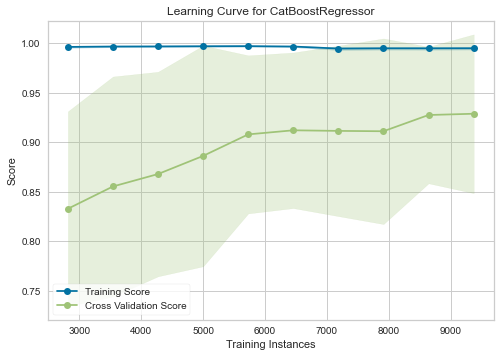

In [21]:
plot_model(final_model,plot='learning')

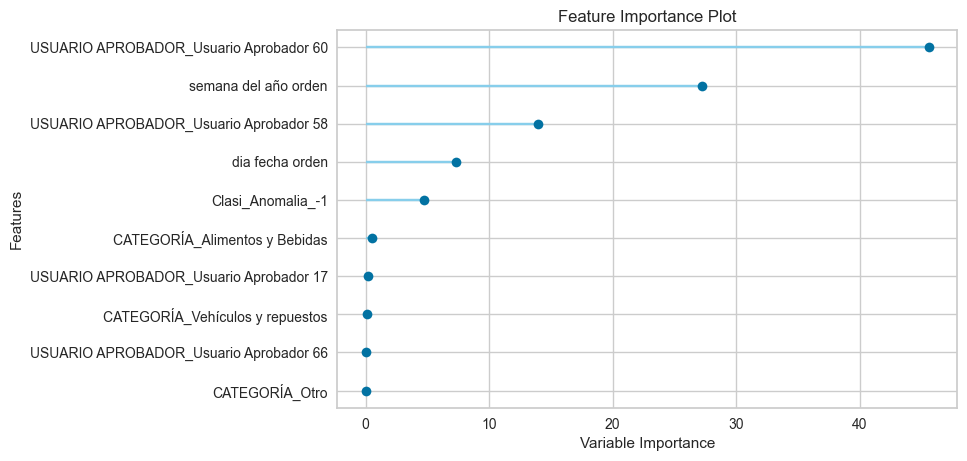

In [22]:
plot_model(final_model,plot='feature')

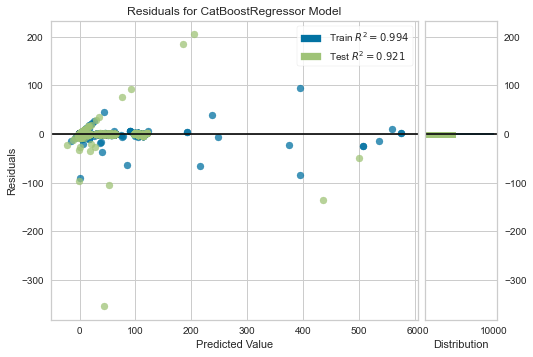

In [23]:
plot_model(final_model,plot='residuals')

In [25]:
predicciones=predict_model(final_model,data=test,round=0)
predicciones[['Dias_transcurridos','Label']].head(5)

,Dias_transcurridos,Label
20513,0,0.330674
20929,1,0.239174
9502,1,-0.081080
16272,57,57.199394
11882,114,113.716942


In [29]:
from sklearn.metrics import mean_squared_error,r2_score,median_absolute_error,explained_variance_score
mse=mean_squared_error(predicciones['Dias_transcurridos'],predicciones['Label'])
r2=r2_score(predicciones['Dias_transcurridos'],predicciones['Label'])
mae=median_absolute_error(predicciones['Dias_transcurridos'],predicciones['Label'])
explain_variance=explained_variance_score(predicciones['Dias_transcurridos'],predicciones['Label'])
print('MSE: ',mse)
print('RMSE: ',np.sqrt(mse))
print('R2: ',r2)
print('MAE: ',mae)


MSE:  84.0763033610096
RMSE:  9.169313134636072
R2:  0.8828642572292213
MAE:  0.31331960345297905


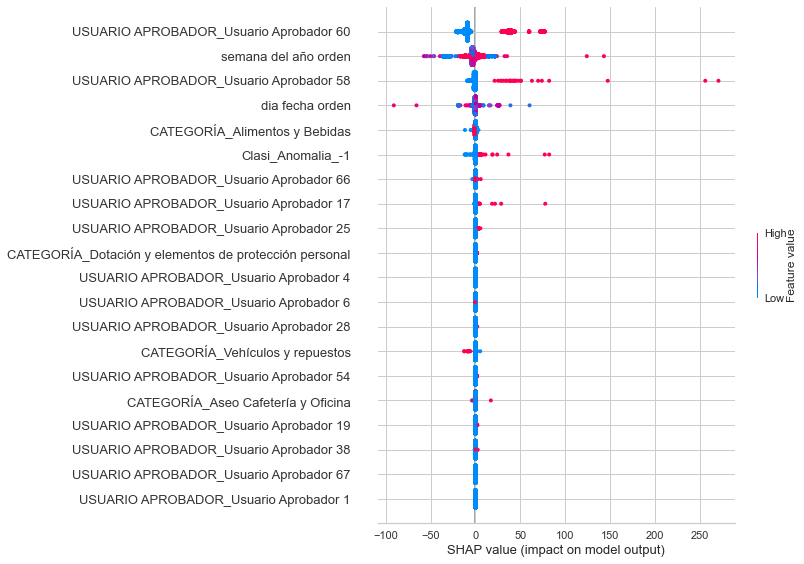

In [30]:
interpret_model(final_model)

In [32]:
tune=tune_model(final_model,optimize='RMSE',fold=5)
tune

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.0894,231.6916,15.2214,0.7914,0.3715,0.2002
1,0.7269,38.6988,6.2208,0.9400,0.3556,0.1920
2,0.9404,72.3039,8.5032,0.9276,0.4012,0.1846
3,0.6161,7.7955,2.7920,0.9895,0.3923,0.1959
4,0.6964,37.3208,6.1091,0.9449,0.3632,0.1882
Mean,0.8138,77.5621,7.7693,0.9187,0.3767,0.1922
SD,0.1746,79.7254,4.1473,0.0670,0.0173,0.0055


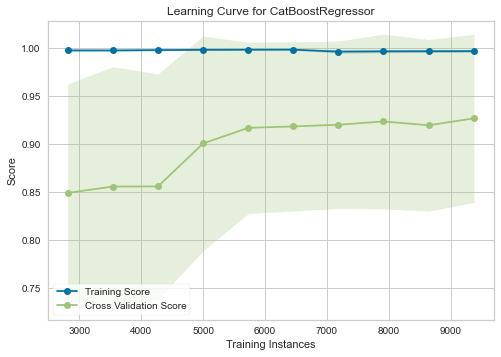

In [33]:
plot_model(tune,plot='learning')

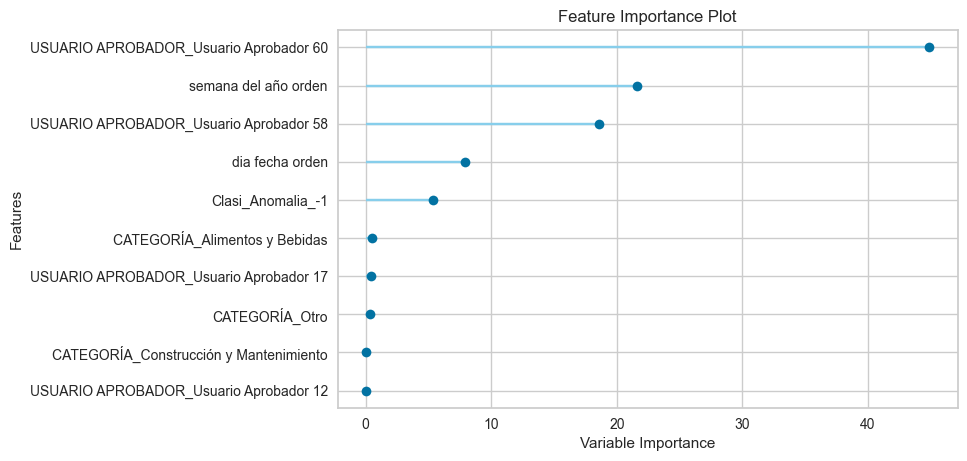

In [35]:
plot_model(tune,plot='feature')

# Modelo sin outlayers

In [52]:
df2=pd.read_excel('C:\\Users\\Admin\\OneDrive\\Documentos\\DataScience2021-2\\Trabajos_propios_felipe\\Proyecto_final\\datos.xlsx')
df2.head()

,Unnamed: 0,NÚMERO PEDIDO,ORDEN NÚMERO,FECHA ORDEN,FECHA ENTREGA,FECHA APROBACION,CATEGORÍA,SUBCATEGORIA,PROVEEDOR,USUARIO,USUARIO APROBADOR,DIRECCION PEDIDO,DIRECCION FACTURACION,CENTRO DE COSTOS,PRESUPUESTO,PORTAL,ESTADO,PRODUCTO O SERVICIO,CODIGO PORTAL,CANTIDAD PEDIDA,CANTIDAD RECIBIDA,PRECIO UNITARIO,PRECIO UNITARIO + IVA,IVA,TOTAL SIN IVA,TOTAL + IVA,FECHA ULTIMO MOVIMIENTO,Dias_transcurridos,Clasi_Anomalia
0,0,# 49561,# 2582,2021-11-10,2021-11-10,2021-11-10,Otro,Lámparas y bombillas y componentes para lámparas,Proveedor 1,Usuario solicitante 1,Usuario Aprobador 1,Direccion 1,NaN,Centro de costos 1,Presupuesto 1,Portal comprador 1,Orden en Proceso,PANEL LED SOBREPONER 24W REDONDO LUZ BLANCA,1200035000063,2.0,NaN,23.364,27.803,4.439,46.728,55.606,2021-11-10,0,1
1,1,# 49560,# 2581,2021-11-10,2021-11-11,2021-11-10,Otro,Publicidad,Proveedor 2,Usuario solicitante 2,Usuario Aprobador 2,Direccion 1,NaN,Centro de costos 2,Presupuesto 2,Portal comprador 1,Recibido,ACTIVIDADES COMERCIALES,1K15774,1.0,1.0,1.476.972,1.757.597,280.625,1.476.972,1.757.597,2021-11-10,0,-1
2,2,# 49559,# 2580,2021-11-10,2021-11-10,2021-11-10,Alimentos y Bebidas,Alimentos preparados y conservados,Proveedor 3,Usuario solicitante 3,Usuario Aprobador 3,Direccion 2,NaN,Centro de costos 3,Presupuesto 3,Portal comprador 1,Orden en Proceso,Lasagna,1K7609,10.0,NaN,15.500,15.500,0,155.000,155.000,2021-11-10,0,1
3,3,# 49558,# 1892,2021-11-10,2021-11-12,2021-11-10,Alimentos y Bebidas,Productos de carne y aves de corral,Proveedor 4,Usuario solicitante 4,Usuario Aprobador 4,Direccion 3,NaN,Centro de costos 4,Presupuesto 4,Portal comprador 2,Orden en Proceso,Pecho de Res Limpio/Sin Grasa,1K15459,50.0,NaN,22.000,22.000,0,1.100.000,1.100.000,2021-11-10,0,1
4,4,# 49557,# 1,2021-11-10,2021-11-09,2021-11-10,Otro,Otra,Proveedor 5,Usuario solicitante 5,Usuario Aprobador 5,Direccion 4,NaN,NaN,NaN,Portal comprador 3,Recibido,"LIBRO CABEZA, CORAZON Y MANOS",1K15761,7.0,7.0,92.084,109.580,17.496,644.588,767.060,2021-11-10,0,1


In [53]:
df2.shape

(21259, 29)

In [54]:
df2['FECHA ORDEN']=pd.to_datetime(df2['FECHA ORDEN'],format='%Y-%m-%d',errors = 'coerce')
df2['FECHA ENTREGA']=pd.to_datetime(df2['FECHA ENTREGA'],format='%Y-%m-%d',errors = 'coerce')
df2['FECHA APROBACION']=pd.to_datetime(df2['FECHA APROBACION'],format='%Y-%m-%d',errors = 'coerce')
df2['FECHA ULTIMO MOVIMIENTO']=pd.to_datetime(df2['FECHA ULTIMO MOVIMIENTO'],format='%Y-%m-%d',errors = 'coerce')
df2['PRECIO UNITARIO']=df2['PRECIO UNITARIO'].apply(lambda x:float(x.replace('.','')))
df2['PRECIO UNITARIO + IVA']=df2['PRECIO UNITARIO + IVA'].apply(lambda x:float(x.replace('.','')))
df2['IVA']=df2['IVA'].apply(lambda x:float(x.replace('.','')))
df2['TOTAL SIN IVA']=df2['TOTAL SIN IVA'].apply(lambda x:float(x.replace('.','')))
df2['TOTAL + IVA']=df2['TOTAL + IVA'].apply(lambda x:float(x.replace('.','')))
df2['dia fecha orden']=df2['FECHA ORDEN'].dt.dayofweek #0 lunes, 6 domingo
df2['mes fecha orden']=df2['FECHA ORDEN'].dt.month #Meses de ordbación 
df2['semana del año orden']=df2['FECHA ORDEN'].dt.isocalendar().week

In [55]:
df_sinoutlayes=df2[df2['Clasi_Anomalia']==1]
df_sinoutlayes.shape

(20507, 32)

In [56]:
21259-20507

752

In [69]:
variables2=df_sinoutlayes[[ 'dia fecha orden',
       'mes fecha orden', 'semana del año orden','USUARIO APROBADOR','CATEGORÍA','Dias_transcurridos']]

In [70]:
variables2['semana del año orden']=variables2['semana del año orden'].astype('float64')


In [89]:
#Datos de entrenamiento y prueba
train2,test2=train_test_split(variables2,train_size=0.7,random_state=125)
print('entrenamiento: ',train2.shape)
print('test: ',test2.shape)

entrenamiento:  (14354, 6)
test:  (6153, 6)


In [90]:
setup(train2,target='Dias_transcurridos',
            train_size=0.7,
            preprocess=True,
            remove_multicollinearity=True,
            multicollinearity_threshold=0.8,
            numeric_features=['dia fecha orden',
                           'mes fecha orden','semana del año orden'],
            
            normalize=True,
            normalize_method='zscore',
      fold_shuffle=True
      
    
      
            );

,Description,Value
0,session_id,2856
1,Target,Dias_transcurridos
2,Original Data,"(14354, 6)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(10047, 62)"


In [91]:
compare_models(fold=10,sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.7329,44.4131,5.4453,0.9319,0.3955,0.2029,0.8490
xgboost,Extreme Gradient Boosting,0.5182,50.1559,5.5670,0.9223,0.3252,0.1501,0.5140
et,Extra Trees Regressor,0.4774,69.9456,6.3610,0.8999,0.3345,0.0829,0.5970
dt,Decision Tree Regressor,0.4278,89.4110,6.8583,0.8537,0.3124,0.0775,0.0260
rf,Random Forest Regressor,0.5444,77.5880,7.7040,0.8802,0.3345,0.0875,0.5450
knn,K Neighbors Regressor,0.6333,84.0620,7.9777,0.8865,0.3736,0.1518,0.0770
lightgbm,Light Gradient Boosting Machine,1.1424,88.8846,8.2285,0.8830,0.5259,0.2730,0.1120
gbr,Gradient Boosting Regressor,1.7516,108.9716,9.7255,0.8438,0.5773,0.4304,0.2170
ada,AdaBoost Regressor,6.2614,243.1267,14.4517,0.6351,0.9819,1.5976,0.1290
br,Bayesian Ridge,6.2471,259.3576,15.7518,0.6279,0.9487,1.4418,0.0430


In [92]:
final_model1=create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.9617,224.2978,14.9766,0.7183,0.3437,0.1721
1,0.7632,81.9447,9.0523,0.8648,0.3908,0.1274
2,0.2459,0.2671,0.5168,0.9996,0.2519,0.1468
3,0.3354,2.8668,1.6932,0.9967,0.3066,0.1534
4,0.3217,2.3195,1.5230,0.9962,0.2926,0.1418
5,0.5609,60.0661,7.7502,0.8970,0.3439,0.1621
6,0.6557,86.8016,9.3167,0.8222,0.3289,0.1809
7,0.4968,24.3876,4.9384,0.9562,0.3426,0.1548
8,0.3650,4.7619,2.1822,0.9946,0.3266,0.1332
9,0.4758,13.8461,3.7210,0.9779,0.3243,0.1287


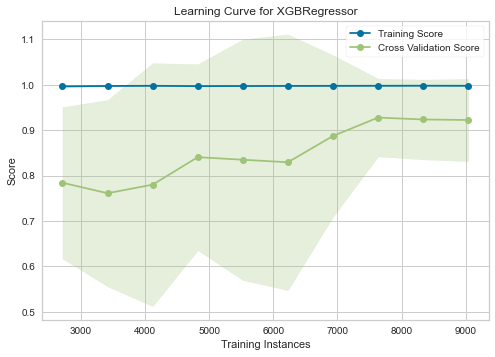

In [93]:
plot_model(final_model1,plot='learning')

In [96]:
tune_model1=tune_model(final_model1, optimize='RMSE',fold=5)
tune_model1

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.9535,131.5216,11.4683,0.8125,0.4321,0.1342
1,0.7318,16.0681,4.0085,0.9791,0.4911,0.2446
2,1.2494,108.7783,10.4297,0.8180,0.5714,0.1869
3,0.9666,30.4039,5.5140,0.9419,0.5756,0.1522
4,0.8029,19.1968,4.3814,0.9745,0.5168,0.1180
Mean,0.9408,61.1937,7.1604,0.9052,0.5174,0.1672
SD,0.1782,48.9047,3.1500,0.0746,0.0534,0.0449


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.4, max_delta_step=0,
             max_depth=10, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=140, n_jobs=-1,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=2856, reg_alpha=0.15,
             reg_lambda=0.1, scale_pos_weight=6.2, subsample=0.5,
             tree_method='auto', validate_parameters=1, verbosity=0)

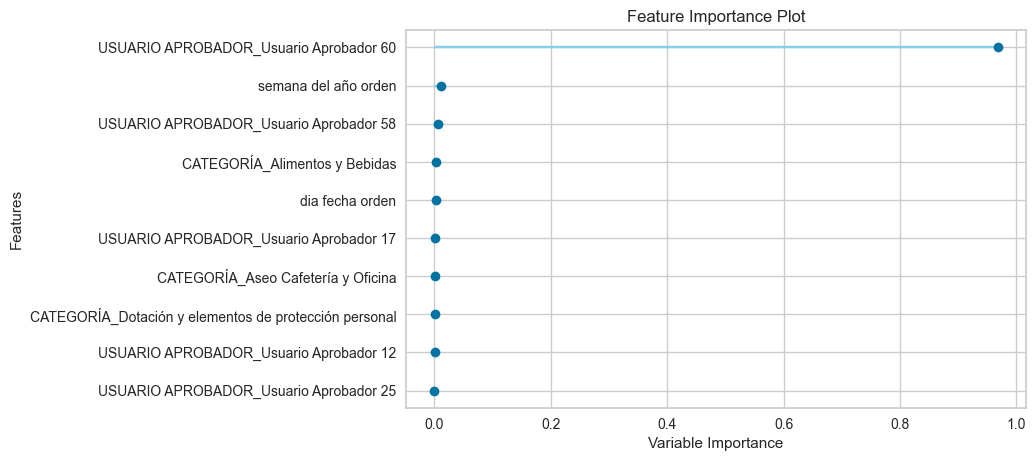

In [94]:
plot_model(final_model1,plot='feature')

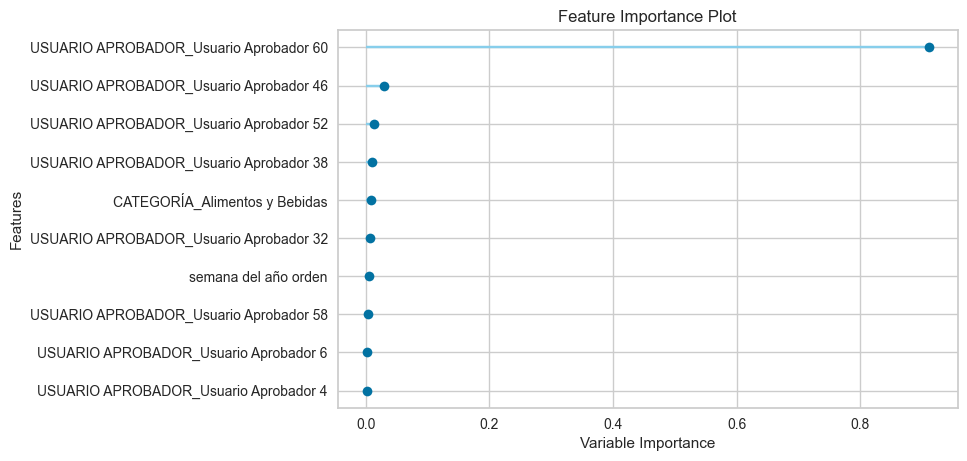

In [87]:
plot_model(tune_model1,plot='feature')

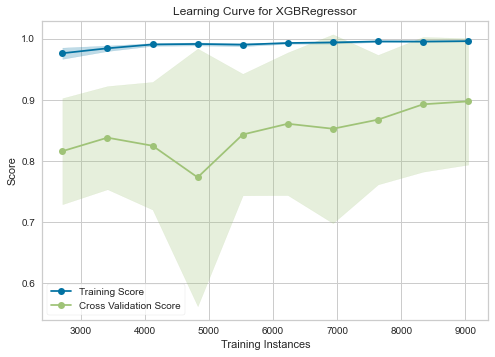

In [99]:
plot_model(tune_model1,plot='learning')

In [78]:
variables2.columns

Index(['dia fecha orden', 'mes fecha orden', 'semana del año orden',
       'USUARIO APROBADOR', 'CATEGORÍA', 'Dias_transcurridos'],
      dtype='object')

In [95]:
predicciones2=predict_model(final_model1,data=test2,round=0)
predicciones2[['Dias_transcurridos','Label']].head(5)

,Dias_transcurridos,Label
13538,38,37.945511
14617,50,49.919315
21145,0,-0.060525
11396,0,-0.032539
11487,98,97.909416


In [9]:
from sklearn.metrics import mean_squared_error,r2_score,median_absolute_error,explained_variance_score
mse=mean_squared_error(predicciones2['Dias_transcurridos'],predicciones2['Label'])
r2=r2_score(predicciones2['Dias_transcurridos'],predicciones2['Label'])
mae=median_absolute_error(predicciones2['Dias_transcurridos'],predicciones2['Label'])
explain_variance=explained_variance_score(predicciones2['Dias_transcurridos'],predicciones2['Label'])
print('MSE: ',mse)
print('RMSE: ',np.sqrt(mse))
print('R2: ',r2)
print('MAE: ',mae)

NameError: name 'predicciones2' is not defined

In [97]:
predicciones22=predict_model(tune_model1,data=test2,round=0)
predicciones22[['Dias_transcurridos','Label']].head(5)

,Dias_transcurridos,Label
13538,38,38.007805
14617,50,49.997307
21145,0,0.002486
11396,0,-0.303303
11487,98,97.381271


In [98]:
mse=mean_squared_error(predicciones2['Dias_transcurridos'],predicciones2['Label'])
r2=r2_score(predicciones22['Dias_transcurridos'],predicciones22['Label'])
mae=median_absolute_error(predicciones22['Dias_transcurridos'],predicciones22['Label'])
explain_variance=explained_variance_score(predicciones22['Dias_transcurridos'],predicciones22['Label'])
print('MSE: ',mse)
print('RMSE: ',np.sqrt(mse))
print('R2: ',r2)
print('MAE: ',mae)

MSE:  62.64593570464968
RMSE:  7.914918553254334
R2:  0.913217195446498
MAE:  0.10904312133789062


## NUEVO MODELO

In [2]:
df3=pd.read_excel('C:\\Users\\Admin\\OneDrive\\Documentos\\DataScience2021-2\\Trabajos_propios_felipe\\Proyecto_final\\datos2.xlsx')
df3.head()

,Unnamed: 0,NÚMERO PEDIDO,ORDEN NÚMERO,FECHA ORDEN,FECHA ENTREGA,FECHA APROBACION,CATEGORÍA,SUBCATEGORIA,PROVEEDOR,USUARIO,USUARIO APROBADOR,DIRECCION PEDIDO,DIRECCION FACTURACION,CENTRO DE COSTOS,PRESUPUESTO,PORTAL,ESTADO,PRODUCTO O SERVICIO,CODIGO PORTAL,CANTIDAD PEDIDA,CANTIDAD RECIBIDA,PRECIO UNITARIO,PRECIO UNITARIO + IVA,IVA,TOTAL SIN IVA,TOTAL + IVA,FECHA ULTIMO MOVIMIENTO,Dias_transcurridos,anamoly_label
0,0,# 49561,# 2582,2021-11-10,2021-11-10,2021-11-10,Otro,Lámparas y bombillas y componentes para lámparas,Proveedor 1,Usuario solicitante 1,Usuario Aprobador 1,Direccion 1,NaN,Centro de costos 1,Presupuesto 1,Portal comprador 1,Orden en Proceso,PANEL LED SOBREPONER 24W REDONDO LUZ BLANCA,1200035000063,2.0,NaN,23.364,27.803,4.439,46.728,55.606,2021-11-10,0,1
1,1,# 49560,# 2581,2021-11-10,2021-11-11,2021-11-10,Otro,Publicidad,Proveedor 2,Usuario solicitante 2,Usuario Aprobador 2,Direccion 1,NaN,Centro de costos 2,Presupuesto 2,Portal comprador 1,Recibido,ACTIVIDADES COMERCIALES,1K15774,1.0,1.0,1.476.972,1.757.597,280.625,1.476.972,1.757.597,2021-11-10,0,-1
2,2,# 49559,# 2580,2021-11-10,2021-11-10,2021-11-10,Alimentos y Bebidas,Alimentos preparados y conservados,Proveedor 3,Usuario solicitante 3,Usuario Aprobador 3,Direccion 2,NaN,Centro de costos 3,Presupuesto 3,Portal comprador 1,Orden en Proceso,Lasagna,1K7609,10.0,NaN,15.500,15.500,0,155.000,155.000,2021-11-10,0,1
3,3,# 49558,# 1892,2021-11-10,2021-11-12,2021-11-10,Alimentos y Bebidas,Productos de carne y aves de corral,Proveedor 4,Usuario solicitante 4,Usuario Aprobador 4,Direccion 3,NaN,Centro de costos 4,Presupuesto 4,Portal comprador 2,Orden en Proceso,Pecho de Res Limpio/Sin Grasa,1K15459,50.0,NaN,22.000,22.000,0,1.100.000,1.100.000,2021-11-10,0,1
4,4,# 49557,# 1,2021-11-10,2021-11-09,2021-11-10,Otro,Otra,Proveedor 5,Usuario solicitante 5,Usuario Aprobador 5,Direccion 4,NaN,NaN,NaN,Portal comprador 3,Recibido,"LIBRO CABEZA, CORAZON Y MANOS",1K15761,7.0,7.0,92.084,109.580,17.496,644.588,767.060,2021-11-10,0,1


In [3]:
df3['FECHA ORDEN']=pd.to_datetime(df3['FECHA ORDEN'],format='%Y-%m-%d',errors = 'coerce')
df3['FECHA ENTREGA']=pd.to_datetime(df3['FECHA ENTREGA'],format='%Y-%m-%d',errors = 'coerce')
df3['FECHA APROBACION']=pd.to_datetime(df3['FECHA APROBACION'],format='%Y-%m-%d',errors = 'coerce')
df3['FECHA ULTIMO MOVIMIENTO']=pd.to_datetime(df3['FECHA ULTIMO MOVIMIENTO'],format='%Y-%m-%d',errors = 'coerce')
df3['PRECIO UNITARIO']=df3['PRECIO UNITARIO'].apply(lambda x:float(x.replace('.','')))
df3['PRECIO UNITARIO + IVA']=df3['PRECIO UNITARIO + IVA'].apply(lambda x:float(x.replace('.','')))
df3['IVA']=df3['IVA'].apply(lambda x:float(x.replace('.','')))
df3['TOTAL SIN IVA']=df3['TOTAL SIN IVA'].apply(lambda x:float(x.replace('.','')))
df3['TOTAL + IVA']=df3['TOTAL + IVA'].apply(lambda x:float(x.replace('.','')))
df3['dia fecha orden']=df3['FECHA ORDEN'].dt.dayofweek #0 lunes, 6 domingo
df3['mes fecha orden']=df3['FECHA ORDEN'].dt.month #Meses de ordbación 
df3['semana del año orden']=df3['FECHA ORDEN'].dt.isocalendar().week

In [4]:
df_sinoutlayes_=df3[df3['anamoly_label']==1]
df_sinoutlayes_.shape

(20196, 32)

In [11]:
variables3=df_sinoutlayes_[[ 'dia fecha orden',
       'mes fecha orden', 'semana del año orden','USUARIO APROBADOR','CATEGORÍA','Dias_transcurridos']]

In [12]:
variables3['semana del año orden']=variables3['semana del año orden'].astype('float64')

In [15]:
#Datos de entrenamiento y prueba
train3,test3=train_test_split(variables3,train_size=0.7,random_state=125)
print('entrenamiento: ',train3.shape)
print('test: ',test3.shape)

entrenamiento:  (14137, 6)
test:  (6059, 6)


In [16]:
setup(train3,target='Dias_transcurridos',
            train_size=0.7,
            preprocess=True,
            remove_multicollinearity=True,
            multicollinearity_threshold=0.8,
            numeric_features=['dia fecha orden',
                           'mes fecha orden','semana del año orden'],
            
            normalize=True,
            normalize_method='zscore',
      fold_shuffle=True
      
    
      
            );

,Description,Value
0,session_id,4183
1,Target,Dias_transcurridos
2,Original Data,"(14137, 6)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(9895, 61)"


In [17]:
compare_models(fold=10,sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.5024,6.2086,2.1748,0.9895,0.3339,0.1916,0.6470
et,Extra Trees Regressor,0.2269,6.8127,2.2632,0.9885,0.2823,0.0895,0.4130
rf,Random Forest Regressor,0.2624,6.4784,2.2639,0.9890,0.2822,0.0993,0.3750
xgboost,Extreme Gradient Boosting,0.3574,7.3820,2.3460,0.9875,0.2979,0.1651,0.3570
knn,K Neighbors Regressor,0.3502,6.7088,2.3614,0.9885,0.3320,0.1497,0.0530
lightgbm,Light Gradient Boosting Machine,0.6001,6.8853,2.4234,0.9882,0.3952,0.2243,0.0650
dt,Decision Tree Regressor,0.2309,8.1282,2.5956,0.9862,0.2882,0.0991,0.0220
gbr,Gradient Boosting Regressor,1.2880,18.3426,4.1997,0.9684,0.5111,0.4067,0.1560
ada,AdaBoost Regressor,3.5374,45.8789,6.7337,0.9214,0.7712,0.5740,0.0740
br,Bayesian Ridge,5.5364,165.1681,12.8277,0.7185,0.8204,1.2878,0.0470


In [18]:
final_model2=create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5471,4.2891,2.0710,0.9932,0.3645,0.2036
1,0.4247,0.8921,0.9445,0.9986,0.3061,0.1766
2,0.4634,1.1052,1.0513,0.9979,0.3234,0.2325
3,0.5096,6.4309,2.5359,0.9885,0.3306,0.1938
4,0.5341,8.9872,2.9979,0.9852,0.3560,0.1892
5,0.4658,0.8174,0.9041,0.9986,0.3216,0.2074
6,0.5715,24.8528,4.9853,0.9571,0.3239,0.1782
7,0.5064,3.2643,1.8067,0.9945,0.3561,0.1671
8,0.5527,9.6286,3.1030,0.9847,0.3429,0.1837
9,0.4490,1.8188,1.3486,0.9965,0.3140,0.1838


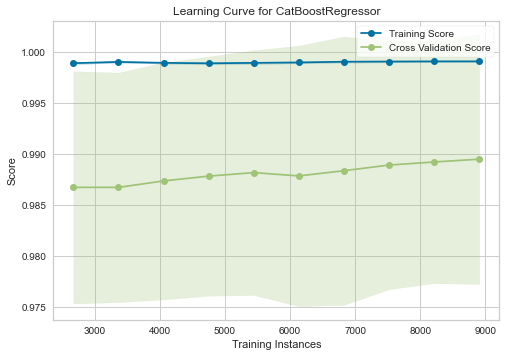

In [19]:
plot_model(final_model2,plot='learning')

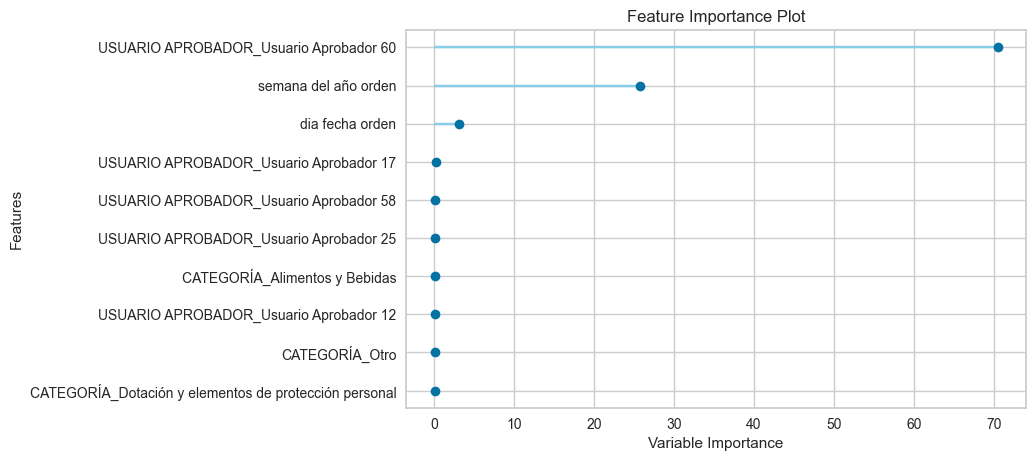

In [20]:
plot_model(final_model2,plot='feature')

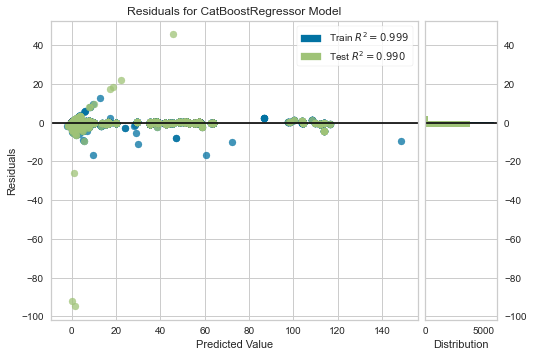

In [21]:
plot_model(final_model2,plot='residuals')

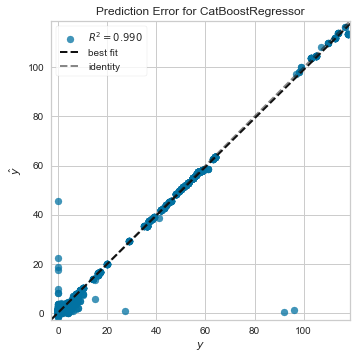

In [24]:
plot_model(final_model2,plot='error')

In [22]:
predicciones3=predict_model(final_model2,data=test3,round=0)
predicciones3[['Dias_transcurridos','Label']].head(5)

,Dias_transcurridos,Label
17077,0,0.024075
9337,0,0.397420
17672,0,0.144991
1471,0,0.123982
11586,105,104.566864


In [23]:
mse=mean_squared_error(predicciones3['Dias_transcurridos'],predicciones3['Label'])
r2=r2_score(predicciones3['Dias_transcurridos'],predicciones3['Label'])
mae=median_absolute_error(predicciones3['Dias_transcurridos'],predicciones3['Label'])
explain_variance=explained_variance_score(predicciones3['Dias_transcurridos'],predicciones3['Label'])
print('MSE: ',mse)
print('RMSE: ',np.sqrt(mse))
print('R2: ',r2)
print('MAE: ',mae)

MSE:  0.9930370662818712
RMSE:  0.9965124516441685
R2:  0.9983146771515503
MAE:  0.21577270846947627


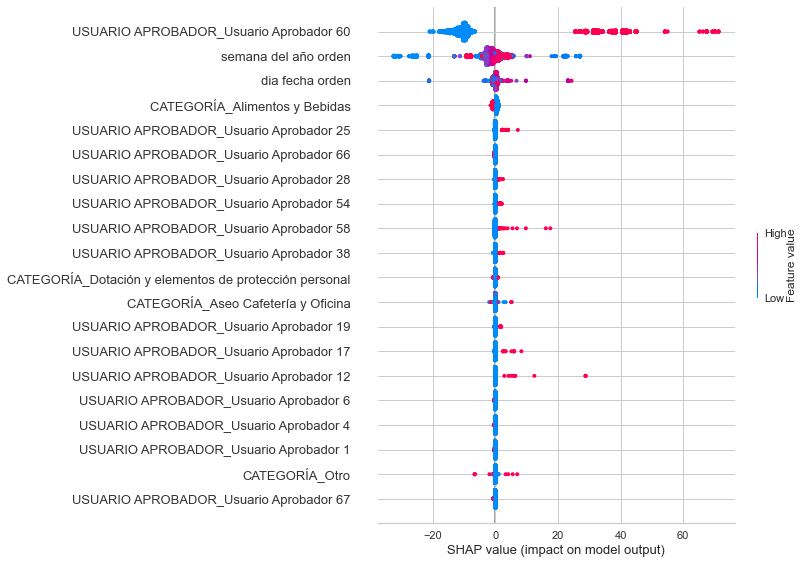

In [25]:
interpret_model(final_model2)

In [26]:
save_model(final_model2,model_name='fechas_aprobacion_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['dia fecha orden',
                                                           'mes fecha orden',
                                                           'semana del año '
                                                           'orden'],
                                       target='Dias_transcurridos',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_v...
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'),
                 ('fix_multi',
                 